1. 子系统标签生成  
2. 执行命令生成  
model修改思路与5.1.1一致。

In [1]:
import torch

In [2]:
dummy_labels = torch.randint(low=0,high=4, size=[40])

In [3]:
dummy_labels

tensor([3, 1, 1, 3, 3, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 3, 1, 0, 1, 3, 2, 3, 3, 0,
        1, 2, 3, 0, 0, 3, 3, 1, 2, 1, 0, 3, 0, 2, 3, 1])

In [4]:
aa =[0,1]

In [5]:
sub_label1 = torch.zeros(40)

In [6]:
for a in aa:
    sub_label1= torch.logical_or(sub_label1, dummy_labels==a)
sub_label1= sub_label1.long()

In [7]:
sub_label1

tensor([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [8]:
'%s' % 2

'2'

In [9]:
a = torch.rand(2,4)
b = []
b.append(a)
c = torch.cat(b, dim=1)
print(c.shape)

torch.Size([2, 4])


In [10]:
a= '[1]'
print(a, type(a))
a = eval(a)
print(a, type(a))

[1] <class 'str'>
[1] <class 'list'>


生成运行代码  
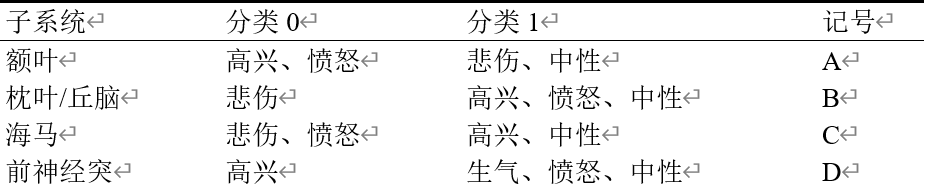  
分类0和1可以互换


In [11]:
clfs = ['[0,1]', '[3]', '[1,3]', '[1]']

In [12]:
bin(15)

'0b1111'

In [13]:
for i in range(16):
    print(bin(i))

0b0
0b1
0b10
0b11
0b100
0b101
0b110
0b111
0b1000
0b1001
0b1010
0b1011
0b1100
0b1101
0b1110
0b1111


In [14]:
from itertools import chain, combinations

def powerset(iterable):
    """
    powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)
    """
    xs = list(iterable)
    # note we return an iterator rather than a list
    return chain.from_iterable(combinations(xs,n) for n in range(len(xs)+1))

In [15]:
for branch in powerset(clfs):
    print(branch)

()
('[0,1]',)
('[3]',)
('[1,3]',)
('[1]',)
('[0,1]', '[3]')
('[0,1]', '[1,3]')
('[0,1]', '[1]')
('[3]', '[1,3]')
('[3]', '[1]')
('[1,3]', '[1]')
('[0,1]', '[3]', '[1,3]')
('[0,1]', '[3]', '[1]')
('[0,1]', '[1,3]', '[1]')
('[3]', '[1,3]', '[1]')
('[0,1]', '[3]', '[1,3]', '[1]')


In [16]:
s1 = 'python main.py --branches={branch}  > ../txts/{out}/{count}.txt 2>&1'
n=0
for branch in powerset(clfs):
    print(s1.format(count=n, out='chapter5_1_2', branch='['+','.join(branch)+']'))
    n += 1

python main.py --branches=[]  > ../txts/chapter5_1_2/0.txt 2>&1
python main.py --branches=[[0,1]]  > ../txts/chapter5_1_2/1.txt 2>&1
python main.py --branches=[[3]]  > ../txts/chapter5_1_2/2.txt 2>&1
python main.py --branches=[[1,3]]  > ../txts/chapter5_1_2/3.txt 2>&1
python main.py --branches=[[1]]  > ../txts/chapter5_1_2/4.txt 2>&1
python main.py --branches=[[0,1],[3]]  > ../txts/chapter5_1_2/5.txt 2>&1
python main.py --branches=[[0,1],[1,3]]  > ../txts/chapter5_1_2/6.txt 2>&1
python main.py --branches=[[0,1],[1]]  > ../txts/chapter5_1_2/7.txt 2>&1
python main.py --branches=[[3],[1,3]]  > ../txts/chapter5_1_2/8.txt 2>&1
python main.py --branches=[[3],[1]]  > ../txts/chapter5_1_2/9.txt 2>&1
python main.py --branches=[[1,3],[1]]  > ../txts/chapter5_1_2/10.txt 2>&1
python main.py --branches=[[0,1],[3],[1,3]]  > ../txts/chapter5_1_2/11.txt 2>&1
python main.py --branches=[[0,1],[3],[1]]  > ../txts/chapter5_1_2/12.txt 2>&1
python main.py --branches=[[0,1],[1,3],[1]]  > ../txts/chapter5_1_2

In [17]:
','.join(('[0,1]', '[3]', '[1,3]', '[1]'))

'[0,1],[3],[1,3],[1]'